In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import k3d
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize
from sloppy.optic import *
from sloppy.raytracing import *
from sloppy.abcd import *
from sloppy.utils import *
from sloppy.tools import *

In [2]:
def LensCavAsphere(arm1=42., arm2=21., base=17., angle=110., lens_dist=21.83, Rlens=5.0, c4=coeffc4(5.0), c6=coeffc6(5.0), c8=coeffc8(5.0)):
    angle = np.deg2rad(angle)
    lens_diam=6.35
    lens_thick=4.
    p0 = np.array([lens_dist/2.-lens_thick/2.,0,0])
    p1 = np.array([lens_dist/2.+lens_thick/2.,0,0])
    p2 = np.array([arm1/2.,0,0])
    p3 = np.array([np.cos(angle)*arm2/2.,base,np.sin(angle)*arm2/2.])
    p4 = np.array([-np.cos(angle)*arm2/2.,base,-np.sin(angle)*arm2/2.])
    p5 = np.array([-arm1/2.,0,0])
    p6 = np.array([-lens_dist/2.-lens_thick/2.,0,0])
    p7 = np.array([-lens_dist/2.+lens_thick/2.,0,0])
    ps = np.stack([p0,p1,p2,p3,p4,p5,p6,p7], axis=0)
    
    geom = geometry(ps)
    ns = geom['refl']
    ps = geom['mir']
    angles = geom['angles']
    Rtr = geom['R']
    ax_x = geom['xin']
    ax_y = np.cross(ns, ax_x)
        
    hi = 12.7
    qi=7.75
    ng = 1.4537
    
    coef = np.zeros(9)
    coef[2] = coeffc2(Rlens)
    coef[4] = c4
    coef[6] = c6
    coef[8] = c8
     #negative sign of firstt cuved surface for abcd matrix
    elements = [Screen(p=np.array([0,0,0]), n=ns[0], ax=ax_x[0], ay=ax_y[0], Rbasis=Rtr[0], diameter=lens_diam),\
                Glass(p=ps[0], n=ns[0], ax=ax_x[0], ay=ax_y[0], Rbasis=Rtr[0], diameter=lens_diam, n2=ng),\
                FreeFormInterface(p=ps[1], n=ns[1], ax=ax_x[1], ay=ax_y[1], Rbasis=Rtr[1], diameter=lens_diam, n1=ng, coef=coef),\
                Mirror(p=ps[2], n=ns[2], ax=ax_x[2], ay=ax_y[2], Rbasis=Rtr[2], diameter=hi),\
                Mirror(p=ps[3], n=ns[3], ax=ax_x[3], ay=ax_y[3], Rbasis=Rtr[3], diameter=hi),\
                Mirror(p=ps[4], n=ns[4], ax=ax_x[4], ay=ax_y[4], Rbasis=Rtr[4], diameter=hi),\
                Mirror(p=ps[5], n=ns[5], ax=ax_x[5], ay=ax_y[5], Rbasis=Rtr[5], diameter=hi),\
                FreeFormInterface(p=ps[6], n=ns[6], ax=ax_x[6], ay=ax_y[6], Rbasis=Rtr[6], diameter=lens_diam, n2=ng, coef=-coef),\
                Glass(p=ps[7], n=ns[7], ax=ax_x[7], ay=ax_y[7], Rbasis=Rtr[7], diameter=lens_diam, n1=ng),\
                Screen(p=np.array([0,0,0]), n=ns[0], ax=ax_x[0], ay=ax_y[0], Rbasis=Rtr[0], diameter=lens_diam)]
    return elements


In [3]:
def LensCavAsphere(arm1=42., arm2=21., base=17., angle=110., lens_dist=24.3, Rlens=5.0, c4=coeffc4(5.0), c6=coeffc6(5.0), c8=coeffc8(5.0)):
    angle = np.deg2rad(angle)
    lens_diam=6.35
    lens_thick=4.
    p0 = np.array([lens_dist/2.-lens_thick/2.,0,0])
    p1 = np.array([lens_dist/2.+lens_thick/2.,0,0])
    p2 = np.array([arm1/2.,0,0])
    p3 = np.array([np.cos(angle)*arm2/2.,base,np.sin(angle)*arm2/2.])
    p4 = np.array([-np.cos(angle)*arm2/2.,base,-np.sin(angle)*arm2/2.])
    p5 = np.array([-arm1/2.,0,0])
    p6 = np.array([-lens_dist/2.-lens_thick/2.,0,0])
    p7 = np.array([-lens_dist/2.+lens_thick/2.,0,0])
    ps = np.stack([p0,p1,p2,p3,p4,p5,p6,p7], axis=0)
    
    geom = geometry(ps)
    ns = geom['refl']
    ps = geom['mir']
    angles = geom['angles']
    Rtr = geom['R']
    ax_x = geom['xin']
    ax_y = np.cross(ns, ax_x)
        
    hi = 12.7
    qi=7.75
    ng = 1.4537
    
    coef = np.zeros(9)
    coef[2] = coeffc2(Rlens)
    coef[4] = c4
    coef[6] = c6
    coef[8] = c8
     #negative sign of firstt cuved surface for abcd matrix
    elements = [Glass(p=ps[0], n=ns[0], ax=ax_x[0], ay=ax_y[0], Rbasis=Rtr[0], diameter=lens_diam, n2=ng),\
                FreeFormInterface(p=ps[1], n=ns[1], ax=ax_x[1], ay=ax_y[1], Rbasis=Rtr[1], diameter=lens_diam, n1=ng, coef=coef),\
                Mirror(p=ps[2], n=ns[2], ax=ax_x[2], ay=ax_y[2], Rbasis=Rtr[2], diameter=hi),\
                Mirror(p=ps[3], n=ns[3], ax=ax_x[3], ay=ax_y[3], Rbasis=Rtr[3], diameter=hi),\
                Mirror(p=ps[4], n=ns[4], ax=ax_x[4], ay=ax_y[4], Rbasis=Rtr[4], diameter=hi),\
                Mirror(p=ps[5], n=ns[5], ax=ax_x[5], ay=ax_y[5], Rbasis=Rtr[5], diameter=hi),\
                FreeFormInterface(p=ps[6], n=ns[6], ax=ax_x[6], ay=ax_y[6], Rbasis=Rtr[6], diameter=lens_diam, n2=ng, coef=-coef),\
                Glass(p=ps[7], n=ns[7], ax=ax_x[7], ay=ax_y[7], Rbasis=Rtr[7], diameter=lens_diam, n1=ng),\
                Screen(p=np.array([0,0,0]), n=-ns[0], ax=-ax_x[0], ay=ax_y[0], Rbasis=Rtr[0], diameter=lens_diam)]
    return elements


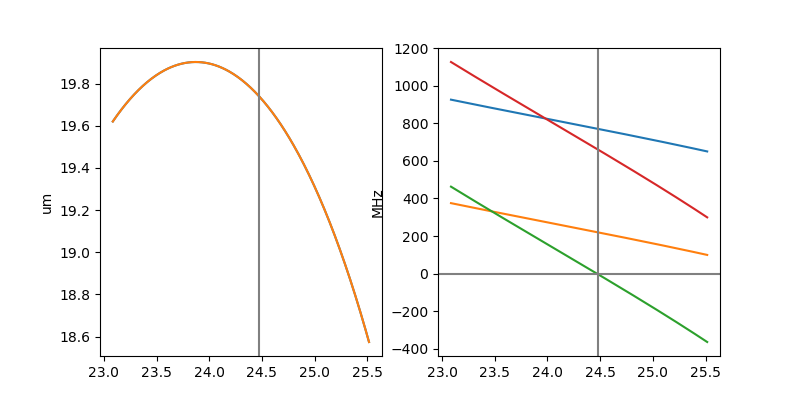

 message: Solution found.
 success: True
  status: 0
     fun: 561.4039980363052
       x: 24.47097760885571
     nit: 9
    nfev: 9


In [4]:
waists_vs_param(LensCavAsphere, 'lens_dist', 0.5e-1)

res = degeneracy_length(LensCavAsphere, 'lens_dist', 0.5e-1, s=3)
Ldeg = res.x
print(res)

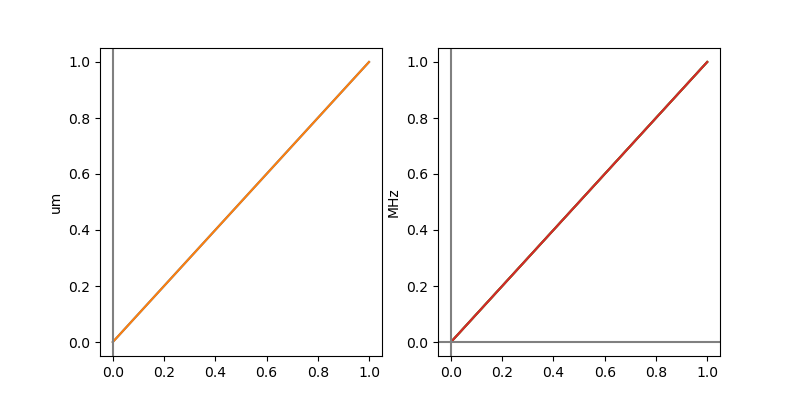

interactive(children=(FloatLogSlider(value=0.1, description='scanrange', layout=Layout(height='30px', width='8…

In [5]:
cavity_parameter_interaction_factory(LensCavAsphere, 'lens_dist', 1e-1, N=100, s=3)

In [6]:
elements = LensCavAsphere(lens_dist=24.47097760885571)
sys = RaySystem(elements)
system = sys.abcd
system.waist_at(0)

array([0.01974093, 0.01974093])

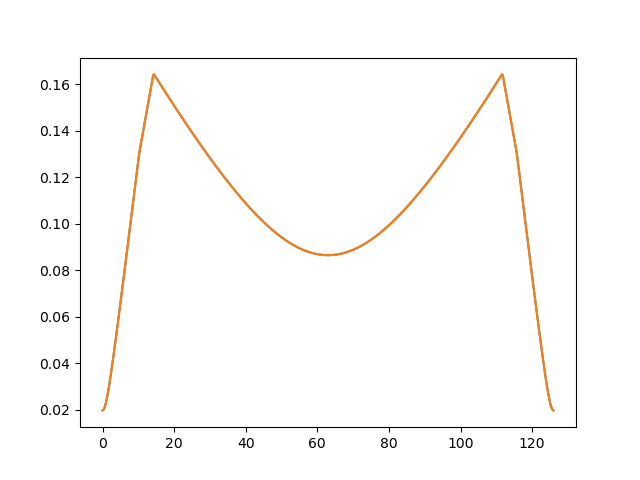

In [7]:
x = np.linspace(0, system.Ltot, 500)
ws = system.compute_waists(x)

plt.figure()
plt.plot(x, ws)
plt.show()

In [9]:
mu = np.array([5e-1, 0., 0., 0])
ray = sys.screen.eigenvectors_to_rays(mu)

In [10]:
mu1, mu2 = system.q
waist = system.waist_at(0)[0] #fix for now since waist is not at 0 anymore!
rmu1 = np.linalg.norm(np.real(mu1[:2]))
rmu2 = np.linalg.norm(np.real(mu2[:2]))

ar=1
ap=0
br=0.0
bp=0.0
mu = np.real(ar*waist/rmu1*mu1*np.exp(1j*ap) + br*waist/rmu2*mu2*np.exp(1j*bp))
ray = sys.screen.eigenvectors_to_rays(mu)

In [11]:
traj = sys.propagate(ray, Nrt=12, at_screen=False)

/Users/lukas/code/sloppy/src/sloppy/raytracing.py:151: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  rcur = elements[j].propagate(rcur, clip=clip)


In [12]:
try:
    plot.close()
except:
    pass
plot = k3d.plot(camera_auto_fit=True, antialias=True)

for i, el in enumerate(sys.elements):
    plot += el.plot(opacity=0.4)

# for i, el in enumerate(sys.elements):
#     plot_element_ax(el, plot, length=5.)

# plot_rays(ray, plot, length=3)

# plot_trajs(_clip_traj(traj), plot)
plot_trajs(traj, plot, color=0x00ffaa)
plot.display()

/Users/lukas/anaconda3/envs/sloppymodern/lib/python3.13/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

In [13]:
def rays_interaction_factory(cavfct, parname, scanrange=1e-2):
    fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(11,6.6), sharex='row', sharey='row')
    ms = 8.
    lines = [a.scatter([], [], c=[], cmap='jet', s=ms) for a in ax.flatten()]
    ax[0,0].set_title('Raytracing')
    ax[0,1].set_title('ABCD')
    ax[0,2].set_title('ABCD (Extracted)')
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')

    res = degeneracy_length(cavfct, parname, scanrange)
    Ldeg = res.x

    def makeidx(hit_m):
        return np.arange(hit_m.shape[0])
    
    magnitude = lambda x: int(np.floor(np.log10(x)))
    
    def update(ar=0.0, br=0.0, ap=0., bp=0., Nrt=500, **kwargs):
        #kwargs.update({parname: Ldeg+dl*1e-1})
        elements = cavfct(**kwargs)
        # sys = RaySystem(elements)
        sys = RaySystem(elements)

        system = sys.abcd
        mu1, mu2 = system.q
        waist = system.waist_at(0)[0] #fix for now since waist is not at 0 anymore!
        rmu1 = np.linalg.norm(np.real(mu1[:2]))
        rmu2 = np.linalg.norm(np.real(mu2[:2]))
        mu = np.real(ar*waist/rmu1*mu1*np.exp(1j*ap) + br*waist/rmu2*mu2*np.exp(1j*bp))
        muswp = np.real(ar*waist/rmu2*mu2*np.exp(1j*ap) + br*waist/rmu1*mu1*np.exp(1j*bp))
        ray0 = sys.screen.eigenvectors_to_rays(mu)
 
        traj_hit = sys.propagate(ray0, Nrt=Nrt, at_screen=True)
        hit_scr = sys.screen.r_to_screen_coords(traj_hit[:,0,0,:])
        hit_scrs = sys.screen.s_to_screen_coords(traj_hit[:,1,0,:])

        lines[0].set_offsets(hit_scr[:,:])
        lines[0].set_array(makeidx(hit_scr))
        lines[3].set_offsets(hit_scrs[:,:])
        lines[3].set_array(makeidx(hit_scrs))
        
        hit_m = propagate_ABCD(muswp, system.abcd_rt, Nrt=Nrt)
        lines[1].set_offsets(hit_m[:,0:2])
        lines[1].set_array(makeidx(hit_m))
        lines[4].set_offsets(hit_m[:,2:])
        lines[4].set_array(makeidx(hit_m))
        
        # abcd_fd = sys.extract_ABCD(epsr=1e-3, epss=1e-4, Nrt=1) 
        # hit_fd = propagate_ABCD(mu, abcd_fd, Nrt=Nrt)
        # lines[2].set_offsets(hit_fd[:,0:2])
        # lines[2].set_array(makeidx(hit_fd))
        # lines[5].set_offsets(hit_fd[:,2:])
        # lines[5].set_array(makeidx(hit_fd))
        
        for l in lines:
            l.set_clim(vmin=0, vmax=Nrt)
            
        ax[0,0].set_xlim(1.5*np.nanmin(hit_scr[:,0]), 1.5*np.nanmax(hit_scr[:,0]))
        ax[0,0].set_ylim(1.5*np.nanmin(hit_scr[:,1]), 1.5*np.nanmax(hit_scr[:,1]))
        ax[1,0].set_xlim(1.5*np.nanmin(hit_scrs[:,0]), 1.5*np.nanmax(hit_scrs[:,0]))
        ax[1,0].set_ylim(1.5*np.nanmin(hit_scrs[:,1]), 1.5*np.nanmax(hit_scrs[:,1]))
        fig.canvas.draw_idle()

    lo = Layout(width='80%', height='30px')

    sliders = {v.name: FloatSlider(value=v.default, min=v.default*0.5, max=v.default*1.5, step=10**(magnitude(v.default)-2), readout_format='.2e', layout=lo) for v in inspect.signature(cavfct).parameters.values()}
    ars = FloatSlider(value=1.0, min=0., max=6., step=1e-2, readout_format='.3f', layout=lo)
    brs = FloatSlider(value=0.1, min=0., max=6., step=1e-2, readout_format='.3f', layout=lo)
    aps = FloatSlider(value=0.0, min=0., max=1*np.pi, step=1e-2, readout_format='.3f', layout=lo)
    bps = FloatSlider(value=0., min=0., max=1*np.pi, step=1e-2, readout_format='.3f', layout=lo)
    Nrts = IntSlider(value=3*33, min=1, max=2000, step=100, layout=lo)
    sliders['lens_dist'] = FloatSlider(value=24.343, min=24.343*0.9, max=24.343*1.1, step=1e-3, readout_format='.3f', layout=lo)
    raysliders = {'ar': ars, 'br': brs, 'ap': aps, 'bp': bps, 'Nrt': Nrts}
    sliders.update(**raysliders)
    return interactive(update, **sliders)

interactive(children=(FloatSlider(value=1.0, description='ar', layout=Layout(height='30px', width='80%'), max=…

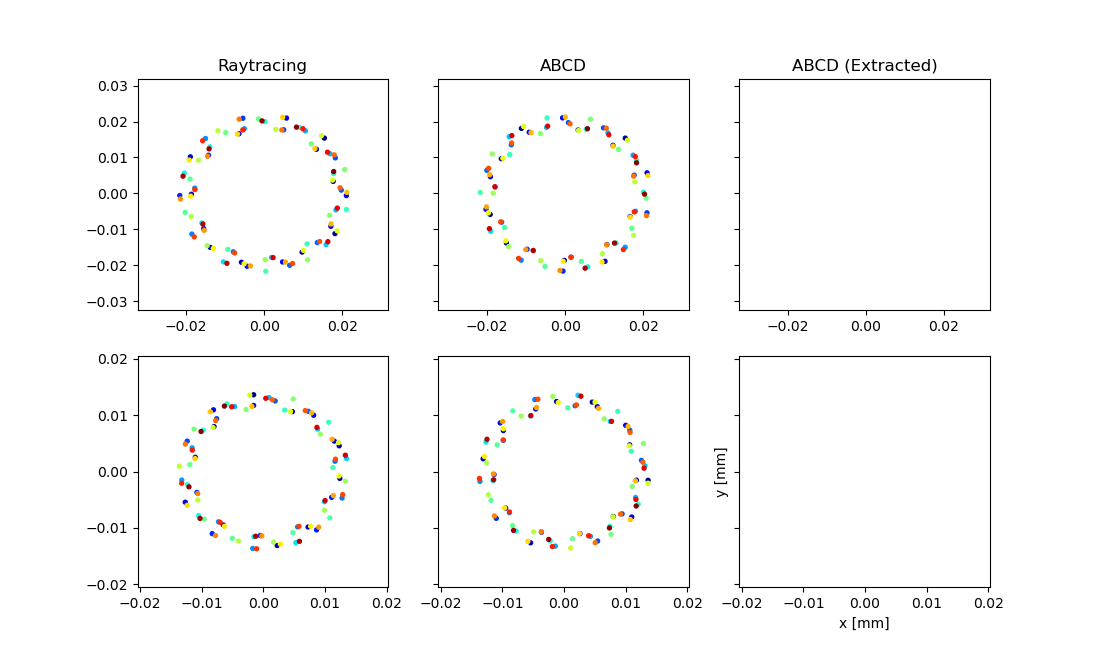

In [14]:
rays_interaction_factory(LensCavAsphere, 'lens_dist')

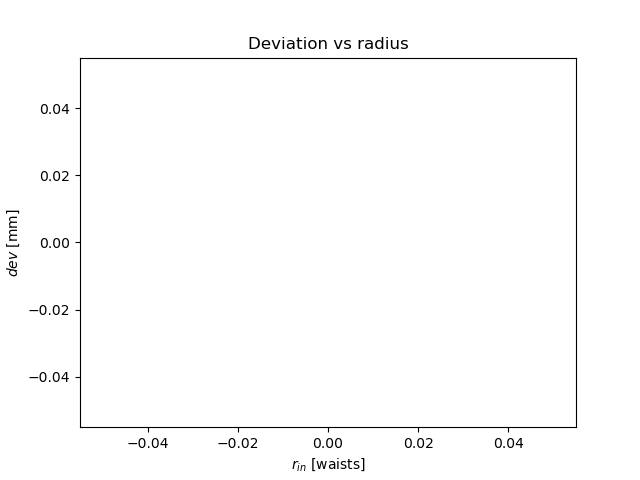

{'c4': -3, 'c6': -5, 'c8': -7}


interactive(children=(FloatSlider(value=1.0, description='c4', layout=Layout(height='30px', width='80%'), max=…

In [15]:
coefficients_interaction_factory(LensCavAsphere, coefpars={'c4': coeffc4(5.0), 'c6': coeffc6(5.0), 'c8': coeffc8(5.0)})

In [16]:
def deviation_tot(x):
    rs = np.linspace(np.finfo(np.float32).resolution,8., 50)
    Ls = np.zeros_like(rs)
        
    for i, r in enumerate(rs):
        try:
            d = get_deviation(r=r, c4=x[0], c6=x[1], c8=x[2])
        except:
            Ls[i] = 1e3#Ls[i-1]*1.1
        else:
            Ls[i] = d
    return np.abs(np.nansum(Ls))

In [17]:
deviation_tot([3.02e-4, 1.97e-6, 5e-7])

np.float32(50000.0)

In [18]:
res = minimize(deviation_tot, x0=[3.02e-4, 1.2e-6, 5e-7])
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 50000.0
        x: [ 3.020e-04  1.200e-06  5.000e-07]
      nit: 0
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 4
     njev: 1

In [19]:
def plot_cs(**kwargs):
    rs = np.linspace(np.finfo(np.float32).resolution,12., 100)
    Ls = np.zeros_like(rs)
    
    #scargs = {}
    #for k, v in kwargs.items():
    #    scargs[k] = v*10**scalings[k]
    
    for i, r in enumerate(rs):
        try:
            d = get_dev(r=r, **kwargs)
        except:
            Ls[i] = np.nan
        else:
            Ls[i] = d
    fig, ax = plt.subplots()
    line = ax.plot(rs, Ls)[0]
    plt.title('Deviation vs radius')
    plt.xlabel(r'$r_{in}$ [waists]')
    plt.ylabel(r'$dev$ [mm]')
    plt.show()

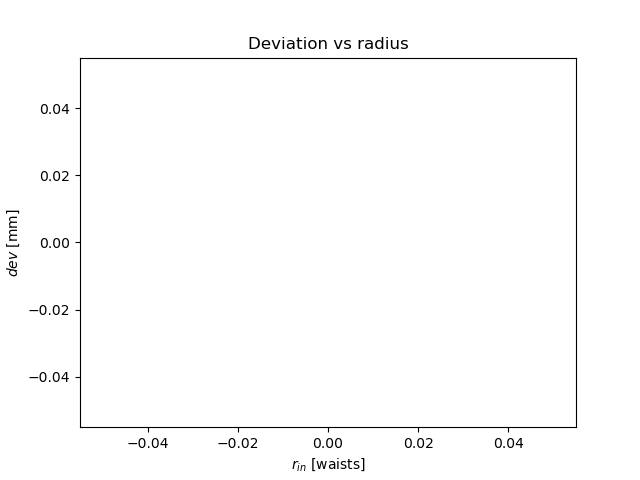

In [20]:
plot_cs(c4=3.02e-04, c6=1.20e-06,  c8=5.00e-07)

In [21]:
cavfct = LensCavAsphere
parname = 'lens_dist'
def plot_config(l=0., ar=0.0, br=0.0, ap=0., bp=0., Nrt=500, ms = 8., **kwargs):
        fig, (ax, bx, cx) = plt.subplots(ncols=3, figsize=(11,3.3), sharex=True, sharey=True)
        linea = ax.scatter([], [], c=[], cmap='jet', s=ms)
        linec = cx.scatter([], [], c=[], cmap='jet', s=ms)
        lineb = bx.scatter([], [], c=[], cmap='jet', s=ms)
        ax.set_title('Raytracing')
        bx.set_title('ABCD')
        cx.set_title('ABCD (Extracted)')
        plt.xlabel('x [mm]')
        plt.ylabel('y [mm]')
        kwargs.update({parname: l})
        elements = cavfct(**kwargs)
        sys = RaySystem(elements)
        system = sys.abcd
        mu1, mu2 = system.q
        waist = system.waist_at(0)[0]
        rmu1 = np.linalg.norm(np.real(mu1[:2]))
        rmu2 = np.linalg.norm(np.real(mu2[:2]))
        mu = np.real(ar*waist/rmu1*mu1*np.exp(1j*ap) + br*waist/rmu2*mu2*np.exp(1j*bp))
        ray0 = sys.screen.eigenvectors_to_rays(mu)
 
        traj_hit = sys.propagate(ray0, Nrt=Nrt, at_screen=True)
        hit_scr = sys.screen.r_to_screen_coords(traj_hit[:,0,0,:])

        linea.set_offsets(hit_scr[:,:])
        linea.set_array(makeidx(hit_scr))
        
        hit_m = propagate_ABCD(mu, system.abcd_rt, Nrt=Nrt)
        lineb.set_offsets(hit_m[:,0:2])
        lineb.set_array(makeidx(hit_m))
        
        #abcd_fd = sys.extract_ABCD(epsr=1e-4, epss=1e-4, Nrt=1) 
        #hit_fd = propagate_ABCD(mu, abcd_fd, Nrt=Nrt)
        #linec.set_offsets(hit_fd[:,0:2])
        #linec.set_array(makeidx(hit_fd))
        
        linea.set_clim(vmin=0, vmax=Nrt)
        lineb.set_clim(vmin=0, vmax=Nrt)
        linec.set_clim(vmin=0, vmax=Nrt)
            
        ax.set_xlim(1.5*np.nanmin(hit_scr[:,0]), 1.5*np.nanmax(hit_scr[:,0]))
        ax.set_ylim(1.5*np.nanmin(hit_scr[:,1]), 1.5*np.nanmax(hit_scr[:,1]))
        return fig

## Eigenray

In [22]:
def plot_config_ray(mu, l=0., Nrt=500, ms = 8., **kwargs):
        fig, (ax, bx, cx) = plt.subplots(ncols=3, figsize=(11,3.3), sharex=True, sharey=True)
        linea = ax.scatter([], [], c=[], cmap='jet', s=ms)
        linec = cx.scatter([], [], c=[], cmap='jet', s=ms)
        lineb = bx.scatter([], [], c=[], cmap='jet', s=ms)
        ax.set_title('Raytracing')
        bx.set_title('ABCD')
        cx.set_title('ABCD (Extracted)')
        plt.xlabel('x [mm]')
        plt.ylabel('y [mm]')
        elements = cavfct(**{parname: l})
        sys = RaySystem(elements)
        ray0 = sys.screen.eigenvectors_to_rays(mu)

        traj_hit = sys.propagate(ray0, Nrt=Nrt, at_screen=True)
        hit_scr = sys.screen.r_to_screen_coords(traj_hit[:,0,0,:])

        linea.set_offsets(hit_scr[:,:])
        linea.set_array(makeidx(hit_scr))
        
        hit_m = propagate_ABCD(mu, system.abcd_rt, Nrt=Nrt)
        lineb.set_offsets(hit_m[:,0:2])
        lineb.set_array(makeidx(hit_m))
        
        abcd_fd = sys.extract_ABCD(epsr=1e-4, epss=1e-4, Nrt=1) 
        hit_fd = propagate_ABCD(mu, abcd_fd, Nrt=Nrt)
        linec.set_offsets(hit_fd[:,0:2])
        linec.set_array(makeidx(hit_fd))
        
        linea.set_clim(vmin=0, vmax=Nrt)
        lineb.set_clim(vmin=0, vmax=Nrt)
        linec.set_clim(vmin=0, vmax=Nrt)
            
        ax.set_xlim(1.5*np.nanmin(hit_scr[:,0]), 1.5*np.nanmax(hit_scr[:,0]))
        ax.set_ylim(1.5*np.nanmin(hit_scr[:,1]), 1.5*np.nanmax(hit_scr[:,1]))
        return fig

In [23]:
#mu = np.array([5e-3, 0., 0, 0])
system = sys.abcd
mu1, mu2 = system.q
waist = system.waist_at(0)[0]
rmu = np.linalg.norm(np.real(mu2[:2]))
r = 5e-3
mu = np.real(r*waist/rmu*mu2)
ray0 = sys.screen.eigenvectors_to_rays(mu)
lr = np.zeros((2, 1, 3))
#lr[1,:,:] = 0.05
lr = 0.05
#reig = sys.find_eigenray(ray0, lr=lr, Nrt=30, debug=True)
reig = sys.find_eigenray_mpe(ray0, lr=lr, Nrt=30, debug=True)
mueig = sys.screen.rays_to_eigenvectors(reig)
mueig

Finished in 0 steps, reached tol 7.421e-11


array([[-6.97947355e-05,  6.97947410e-05,  4.44664109e-05,
         4.44664074e-05]])

NameError: name 'makeidx' is not defined

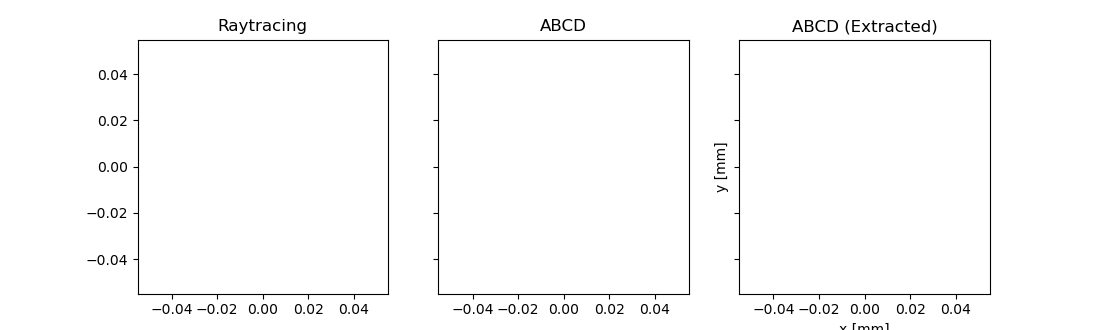

In [24]:
f = plot_config_ray(np.squeeze(mueig), Ldeg)
f.show()

In [31]:
def degeneracy_length_eigenray(cavfct, parname, r=0, scanrange=1e-3, La=None):
    def get_dev(l, r):
        elements = cavfct(**{parname: l})
        sys = RaySystem(elements)
        system = sys.abcd
        mu1, mu2 = system.q
        waist = system.waist_at(0)[0]
        rmu = np.linalg.norm(np.real(mu2[:2]))
        mu = np.real(r*waist/rmu*mu2)
        ray0 = sys.screen.eigenvectors_to_rays(mu)
        lr = 0.05
        reig = sys.find_eigenray(ray0, lr=lr, Nrt=3, debug=False)
        #reig = sys.find_eigenray_mpe(ray0, lr=lr, Nrt=30, debug=False)
        mueig = sys.screen.rays_to_eigenvectors(reig)
        
        ray1 = sys.screen.eigenvectors_to_rays(mu)
        traj_hit = sys.propagate(ray1, Nrt=30, at_screen=True)
        hit_scr = sys.screen.r_to_screen_coords(traj_hit[:,0,0,:])
        hit_1 = hit_scr[::3,:]
        return np.var(hit_1, axis=0).sum()
    if La is None:
        La = inspect.signature(cavfct).parameters[parname].default
    res = minimize_scalar(get_dev, bounds=((1-scanrange)*La, (1+scanrange)*La), args=(r,), method='bounded')
    return res

In [ ]:
degeneracy_length_eigenray(cavfct, parname, r=1e-3, scanrange=1e-3, La=Ldeg)

 message: Solution found.
 success: True
  status: 0
     fun: 1.9298683788912428e-22
       x: 24.470977782894686
     nit: 6
    nfev: 6

In [33]:
rs = np.linspace(0,8., 100)
Ls = np.zeros_like(rs)
lcur = Ldeg
for i, r in enumerate(rs):
    try:
        l = degeneracy_length_eigenray(cavfct, parname, r=r, scanrange=1e-2, La=lcur).x
    except:
        Ls[i] = np.nan
    else:
        Ls[i] = l
        lcur = l

In [34]:
idx = np.where(rs>5.)[0][0] #only for up to
coef = np.polyfit(rs[:idx], Ls[:idx], deg=4)
coef

array([nan, nan, nan, nan, nan])

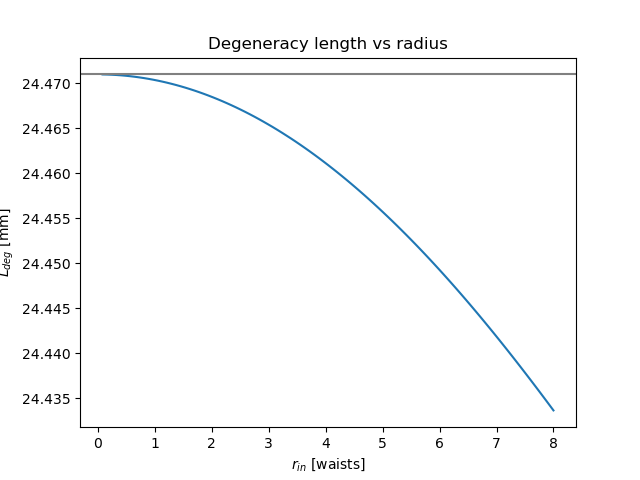

In [ ]:
plt.figure()
plt.plot(rs, Ls)
plt.title('Degeneracy length vs radius')
plt.xlabel(r'$r_{in}$ [waists]')
plt.ylabel(r'$L_{deg}$ [mm]')
plt.axhline(Ldeg, color='grey')
plt.plot(rs, np.polyval(coef, rs), '--')
plt.show()

NameError: name 'makeidx' is not defined

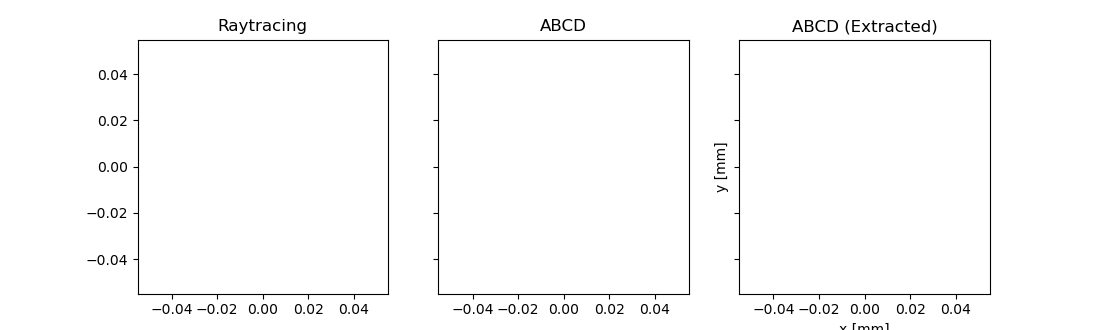

In [ ]:
rw = 5.5
interp=False
if interp:
    lw = np.polyval(coef, rw)
else:
    idx = np.where(rs>rw)[0][0]
    lw = Ls[idx]
    rw = rs[idx]
f = plot_config(l=lw, br=rw, Nrt=500, ms=4)
f.show()